# Welcome to Recitation 9!

You will hand this recitation in with the homework on April 19.

In this assignment, you will be making predictions based on time series data from a sales of a collection of consumer products from the company that sells Stovetop Stuffing. These products exhibit strong seasonal sales patterns.

You'll be exposed to many different ways of making predictions and you'll get to see some of the drawbacks of each. You should be largely self-sufficient with python and pandas for data science by this point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

## Part 1: Data

1.1. Read in the SalesAndForecastsByLine.csv into a dataframe.  Then print some of the data to see what it looks like.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('SalesAndForecastsByLine.csv')
df.head()

,LineNumber,Year,MonthNumber,TotalProductSales
0,101,2000,4,14268
1,101,2000,5,32951
2,101,2000,6,65325
3,101,2000,7,38641
4,101,2000,8,60507


1.2 Create a new column in the table called "Date".

Fill this column with the dates as strings in the form month-year. For example May 2020 would be 5-2020. Print the data again to see if the column was created properly.

In [4]:
# YOUR CODE HERE
df["Date"] = 0
for index, row in df.iterrows():
    df.loc[index, "Date"] = str(row["MonthNumber"]) + '-' + str(row["Year"]) 
df.head()

,LineNumber,Year,MonthNumber,TotalProductSales,Date
0,101,2000,4,14268,4-2000
1,101,2000,5,32951,5-2000
2,101,2000,6,65325,6-2000
3,101,2000,7,38641,7-2000
4,101,2000,8,60507,8-2000


1.3 Now create a column in your dataframe that contains each date in the Date field in your dataframe (which is a string) converted to the datetime type. `datetime` is the datatype that Pandas uses to store dates and it is very helpful when plotting quantities versus date or time. 

One way to do this is with `iterrows()`, as in the following example code:

```
for index, row in df.iterrows():
    df.loc[index,'t'] = # calculate value from row['Date']
```

There are other ways as well. Once you are done, output some rows from the dataframe again to make sure that you are computing your datetime field correctly.

Hint: Use the strptime from the datetime module. Documentation can be found here: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior.  the strptime function will parse string arguments into datetime objects, based on the format that you provide.  If you have a string stored in a variable called `date` in a format where 5-2020 represents May 2020, then calling `datetime.strptime(date,'%m-%Y')` will return a datetime object representing May 2020.

In [5]:
# YOUR CODE HERE
df["Datetime"] = 0
for index, row in df.iterrows():
    df.loc[index,'Datetime'] = datetime.strptime(row['Date'],'%m-%Y')
df.head()

,LineNumber,Year,MonthNumber,TotalProductSales,Date,Datetime
0,101,2000,4,14268,4-2000,2000-04-01 00:00:00
1,101,2000,5,32951,5-2000,2000-05-01 00:00:00
2,101,2000,6,65325,6-2000,2000-06-01 00:00:00
3,101,2000,7,38641,7-2000,2000-07-01 00:00:00
4,101,2000,8,60507,8-2000,2000-08-01 00:00:00


1.4 Now create 5 different dataframes, one for each of the product line numbers, by filtering on the `LineNumber` field.

Then plot `TotalProductSales` vs. date (using your new datetime field) for each of the 5 product lines.  Put them all on one plot. This can be accomplished by calling plt.plot for each of the 5 dataframes all in 1 cell. matplotlib should figure out on its own to use different colors for each.

In [6]:
# YOUR CODE HERE
df_101 = df[df["LineNumber"] == 101]
df_102 = df[df["LineNumber"] == 102]
df_103 = df[df["LineNumber"] == 103]
df_104 = df[df["LineNumber"] == 104]
df_105 = df[df["LineNumber"] == 105]

C:\Users\bls24\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


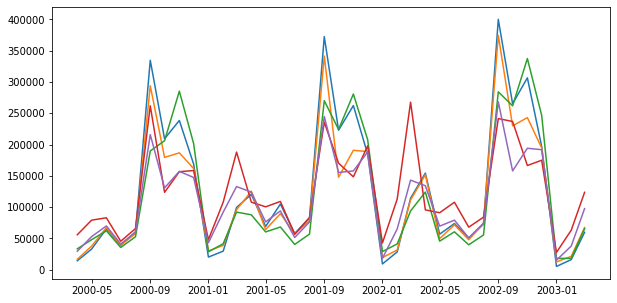

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df_101["Datetime"], df_101["TotalProductSales"])
plt.plot(df_102["Datetime"], df_102["TotalProductSales"])
plt.plot(df_103["Datetime"], df_103["TotalProductSales"])
plt.plot(df_104["Datetime"], df_104["TotalProductSales"])
plt.plot(df_105["Datetime"], df_105["TotalProductSales"])
#plt.xlim('2001-04','2001-12')

1.5 What times of year are particularly busy for these products?  You may find that you need to expand the size of your graph to see the dates.  You can do this with the code `plt.figure(figsize=(10,5))` run in the same cell and before any `plt.plot` commands.  You can also zoom in to particular regions of the figure using `plt.xlim`.  For example, `plt.xlim('2000-04','2000-12')` zooms in to April to December 2000.

**The months of September and November are particularly busy for these products**

## Part 2: Linear Fit

We use statsmodels.api to fit the data using ordinary least squares (OLS).

In [9]:
import statsmodels.api as sm

2.1. Fit OLS on the data for product line 102. Use the sales data as your outcome y.  Include an intercept. We will use an integer that increments by 1 each month as our single predictor. 

To quickly get this integer, first use the code `df2_linear = df2.reset_index()`, where this assumes that `df2` is the name of the dataframe containing data for product line 102. This creates a dataframe that contains an additional column, `index`, that contains a sequence of integers. This relies on the fact that our dataframe had data for product line 102 in increasing time order.

Then call `summary()` to see the results of your fit.

In [12]:
# YOUR CODE HERE
X = df_102.reset_index()["index"]
Y = df_102.reset_index()["TotalProductSales"]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TotalProductSales   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.5627
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.458
Time:                        18:23:59   Log-Likelihood:                -462.57
No. Observations:                  36   AIC:                             929.1
Df Residuals:                      34   BIC:                             932.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.535e+04   8.28e+04      0.668      0.508   -1.13e+05    2.24e+05
index       1140.1140   1519.836      0.750      0.458   -1948.564    4228.792
==============================================================================
Omnibus:                        7.635   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.652
Skew:                           1.034   Prob(JB):                       0.0359
Kurtosis:                       3.396   Cond. No.                         286.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.2: Plot the predictions from linear regression and your data (TotalProductSales) for product line 101.

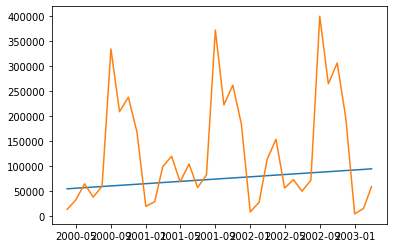

In [13]:
# YOUR CODE HERE
X_101 = df_101.reset_index()["index"]
X_101 = sm.add_constant(X_101)
prediction = model.predict(X_101)
plt.plot(df_101["Datetime"],prediction)
plt.plot(df_101["Datetime"], df_101["TotalProductSales"])

2.3 What are some drawbacks of this method?

**This linear model does not represent the cyclical nature of annual sales for this product.**

2.4 Calculate the sum of squared errors resulting from this method. To do this, calculate a series containing the difference between the actual and predicted values. Then calculate the square of each component of this series.  Then sum the values. You should be able to do this in a single line of code.

Given a series `x`, the series `x.pow(2)` contains the square of each element of `x`.

In [14]:
# YOUR CODE HERE
frame = pd.DataFrame()
df_101['difference'] = df_101["TotalProductSales"] - prediction 
series = df_101["difference"].pow(2)
series.sum()

C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


522272070492.4952

## Part 3: Exponential Smoothing

We now use simple exponential smoothing to predict, now using product line 102. This assumes that the data has no consistent trend and consists only of a mean that slowly varies up and down and has noise added to it.

In [15]:
from statsmodels.tsa.api import SimpleExpSmoothing

3.1: To use simple exponential smoothing, we need to create a Series containing TotalProductSales for product line 102 that has our datetime object as the index.  The easiest way to do this is to create a new dataframe using  set_index() and then extract the `TotalProductSales` field from this dataframe.  Name the resulting Series `sales2`.

In [16]:
# YOUR CODE HERE
df_sales2 = df_102.set_index("Datetime")
sales2 = df_sales2["TotalProductSales"]

Then, the following line of code creates a simple exponential fit for the data.

The code will say that "No frequency information was provided, so inferred frequency MS will be used." This is ok -- it just means that we didn't tell SimpleExpSmoothing about a period over which we might expect to see repeating patterns.

In [17]:
fit1 = SimpleExpSmoothing(sales2.astype(np.float)).fit()

C:\Users\bls24\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Then, the following code gets a forecast for the next 4 upcoming periods.

In [18]:
fore1 = fit1.forecast(4)
fore1

2003-04-01    73041.79019
2003-05-01    73041.79019
2003-06-01    73041.79019
2003-07-01    73041.79019
Freq: MS, dtype: float64

3.2: Plot the values fitted to our original timeseries, the original sales data for line 102, and the forecasted values.  The fitted values are in `fit1.fittedvalues`. The forecasted values can be plotted using `fore1.plot()`.

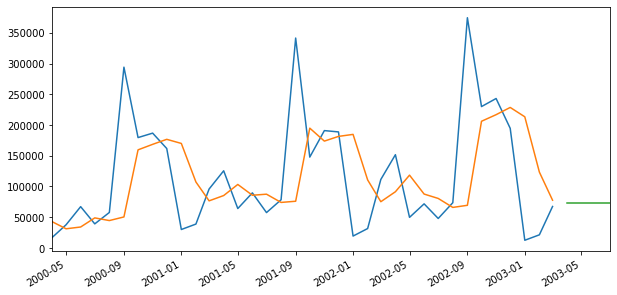

In [84]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.plot(df_102["Datetime"],df_102["TotalProductSales"])
plt.plot(df_102["Datetime"],fit1.fittedvalues)
fore1.plot()

3.3 Calculate the sum of squared errors between this method's predictions and the actual value.

In [36]:
# YOUR CODE HERE
sse = 0
for i in range(len(sales2)):
    sse += (fit1.fittedvalues[i] - sales2[i])**2
sse

355327812319.925

3.4: Based on the sum of squared errors, is this method better or worse than linear regression?

**This method is much better than linear regression given that the sse is significantly lower than the sse of the linear regression**

3.5: Where does this method do particularly badly? How does this relate to your answer to question 1.5?

**This method doesnt do a great job of predicting the full extend of the large seasonal spike in product sales in September and November, as discussed in question 1.5**

## Part 4: Holt Linear

Now we will fit this same data using the `Holt` method.  We import the package `Holt` for this part and `ExponentialSmoothing` (also called the Holt-Winters method) for the next part.

The Holt method assumes that the data has a trend and that the slope of the trend is slowly varying over time. It also assumes that there is an additional change to the overall mean that is slowly shifting everything up and down, and that the observations have noise. 

This method is able to make predictions that have the same form as simple exponential smoothing, and also the same form as linear regression, as two special cases.

In [38]:
## Holt Double Exponential Linear
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

4.1: Fit the Holt method on the data series created for the previous part and generate a forecast for the next 5 values. Above we used the code 
```
fit1 = SimpleExpSmoothing(sales2).fit()
fore1 = fit1.forecast(4)
```
to fit simple exponential smoothing and forecast for 4 values. The code for the Holt method is similar, except we replace `SimpleExpSmoothing` by `Holt`, and we forecast for 5 values instead of 4.

In [66]:
# YOUR CODE HERE
fit2 = Holt(sales2.astype(np.float)).fit()
fore2 = fit2.forecast(5)
fore2

C:\Users\bls24\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2003-04-01    70833.847829
2003-05-01    72288.810377
2003-06-01    73743.772925
2003-07-01    75198.735474
2003-08-01    76653.698022
Freq: MS, dtype: float64

4.2: Now plot the forecast, fitted values, and orignal sales data. We use 

In [64]:
import datetime
last_date = 1
for i in df_102["Datetime"]:
    last_date = i
print(last_date)
forcast_dates = []
for i in range(5):
    forcast_dates.append(last_date + datetime.timedelta(days=(31*i)))
forcast_dates

2003-03-01 00:00:00


[datetime.datetime(2003, 3, 1, 0, 0),
 datetime.datetime(2003, 4, 1, 0, 0),
 datetime.datetime(2003, 5, 2, 0, 0),
 datetime.datetime(2003, 6, 2, 0, 0),
 datetime.datetime(2003, 7, 3, 0, 0)]

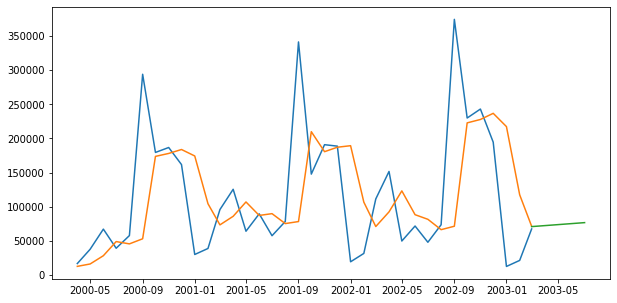

In [65]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.plot(df_102["Datetime"],df_102["TotalProductSales"], label = 'original data')
plt.plot(df_102["Datetime"],fit2.fittedvalues, label='fitted values')
plt.plot(forcast_dates,fore2, label='forcast')

4.3 Calculate the sum of square errors between this method's predictions and the actual value.

In [69]:
# YOUR CODE HERE
sse = 0
for i in range(len(sales2)):
    sse += (fit2.fittedvalues[i] - sales2[i])**2
sse

356141776567.1156

4.4 How does the sum of squared errors for this method compare to simple exponential smoothing?  To linear regression? Why do you think this is?

**The sse of the holt method is slightly larger than the sse of simple exponential smoothing and much lower than the sse of the linear regression. This might be the case because simple exponential smoothing takes into account the seasonal cycles of the data for the fit.**

## Part 5: Holt-Winters Method

5.1: Now we will use the Holt-Winters method, also called ExponentialSmoothing, on the same series of data. This allows for a trend (either additive or multiplicative), and seasonality (also, either additive or multiplicative), which we specify when we create the ExponentialSmoothing object. We also need to specify the number of periods to use for our seasonality.

We'll create this object using this code:

```
ExponentialSmoothing(sales2, trend = "add", seasonal = "add", seasonal_periods = ?)
```
where you need to fill in the value of seasonal_periods. This is the number of periods (each datapoint is 1 period) over which we see the strongest repeating period. Keep in mind that each datapoint is a month, and keep in mind what you learned in question 1.4 and 1.5 about patterns in the data.

Fit the Holt-Winters method and make a forecast for 12 periods.

In [77]:
# YOUR CODE HERE
fit3 = ExponentialSmoothing(sales2.astype(np.float), trend='mul', seasonal='mul', seasonal_periods=12).fit()
fore3 = fit3.forecast(12)

C:\Users\bls24\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\bls24\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [78]:
import datetime
last_date = 1
for i in df_102["Datetime"]:
    last_date = i
forcast_dates2 = []
for i in range(12):
    forcast_dates2.append(last_date + datetime.timedelta(days=(31*i)))

5.2: Plot the fit, forecasts, and original sales data.

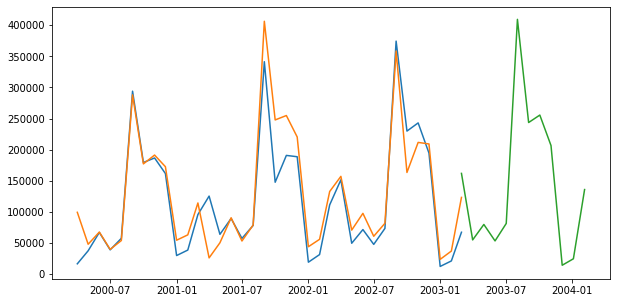

In [79]:
## YOUR CODE HERE
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.plot(df_102["Datetime"],df_102["TotalProductSales"], label = 'original data')
plt.plot(df_102["Datetime"],fit3.fittedvalues, label='fitted values')
plt.plot(forcast_dates2,fore3, label='forcast')

This is a good opportunity to changing the trend and seasonality type to see what happens.  You can set this to `"mul"` for either `trend` or `seasonal` to use a multiplicative trend or seasonality.

If you chose seasonal_periods well, you should see that this method works really well --- much better than the other methods.

5.3 Calculate the sum of squared errors between this method's predictions and the actual value. How does it compare to the sum of squared errors for the other methods?

In [83]:
# YOUR CODE HERE
sse = 0
for i in range(len(sales2)):
    sse += (fit3.fittedvalues[i] - sales2[i])**2
sse

50596558278.93631

5.4: What is it that this method does that allows it to do so well?

**The method is able to fit and forecast the data so well because it includes seasonality in the fitted data and also in the forecast**